In [2]:
import pandas as pd

data = pd.read_csv('Online Payment Fraud Detection.csv')

In [3]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


In [4]:
data.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1048575 non-null  int64  
 1   type            1048575 non-null  object 
 2   amount          1048575 non-null  float64
 3   nameOrig        1048575 non-null  object 
 4   oldbalanceOrg   1048575 non-null  float64
 5   newbalanceOrig  1048575 non-null  float64
 6   nameDest        1048575 non-null  object 
 7   oldbalanceDest  1048575 non-null  float64
 8   newbalanceDest  1048575 non-null  float64
 9   isFraud         1048575 non-null  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 80.0+ MB


In [7]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,2.696617e+01,1.586670e+05,8.740095e+05,8.938089e+05,9.781600e+05,1.114198e+06,1.089097e-03
std,1.562325e+01,2.649409e+05,2.971751e+06,3.008271e+06,2.296780e+06,2.416593e+06,3.298351e-02
min,1.000000e+00,1.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.500000e+01,1.214907e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.000000e+01,7.634333e+04,1.600200e+04,0.000000e+00,1.263772e+05,2.182604e+05,0.000000e+00
75%,3.900000e+01,2.137619e+05,1.366420e+05,1.746000e+05,9.159235e+05,1.149808e+06,0.000000e+00
max,9.500000e+01,1.000000e+07,3.890000e+07,3.890000e+07,4.210000e+07,4.220000e+07,1.000000e+00


In [44]:
data.step.describe().astype(int)[:10]

count    1048575
mean          26
std           15
min            1
25%           15
50%           20
75%           39
max           95
Name: step, dtype: int32

In [45]:
data.amount.describe().astype(int)[:10]

count     1048575
mean       158666
std        264940
min             0
25%         12149
50%         76343
75%        213761
max      10000000
Name: amount, dtype: int32

In [9]:
data['type'].value_counts()

CASH_OUT    373641
PAYMENT     353873
CASH_IN     227130
TRANSFER     86753
DEBIT         7178
Name: type, dtype: int64

In [10]:
data.groupby('type').isFraud.sum().astype(int)[:10]

type
CASH_IN       0
CASH_OUT    578
DEBIT         0
PAYMENT       0
TRANSFER    564
Name: isFraud, dtype: int32

In [46]:
data.groupby('type').amount.sum().astype(int)[:10]

type
1   -2147483648
2   -2147483648
3   -2147483648
4   -2147483648
5      42195994
Name: amount, dtype: int32

<AxesSubplot:>

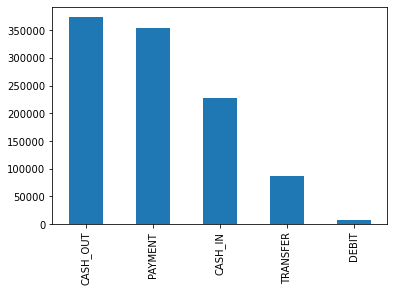

In [11]:
data.type.value_counts().plot.bar()

<AxesSubplot:>

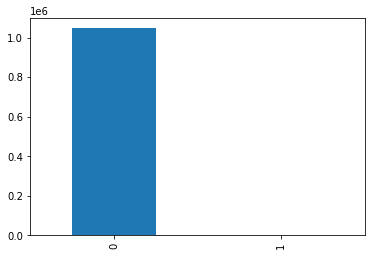

In [12]:
data.isFraud.value_counts().plot.bar()

In [47]:
type = data["type"].value_counts()
transactions = type.index
quantity = type.values

import plotly.express as px
chart = px.pie(data, 
             values=quantity, 
             names=transactions,hole = 0.5, 
             title="Distribution of Transaction Type")
chart.show()

<AxesSubplot:>

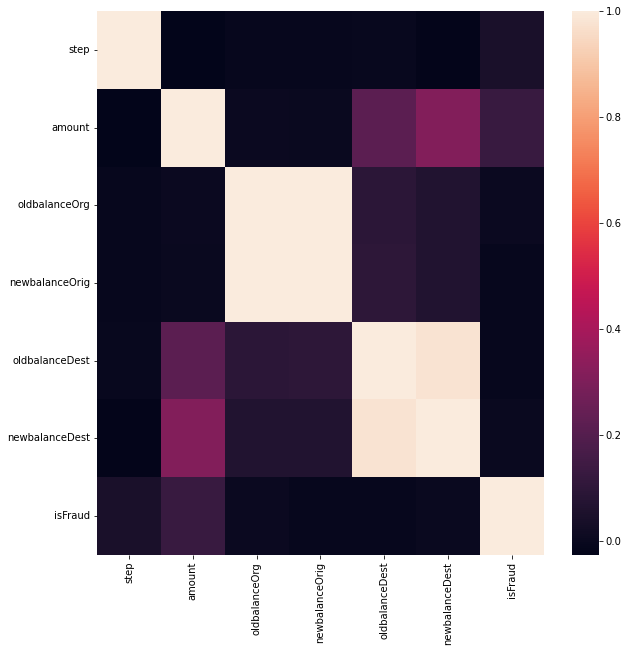

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
sns.heatmap(data.corr())

In [18]:
data['amount'].corr(data['newbalanceOrig'])

-0.0011330582655458723

In [19]:
data['amount'].corr(data['newbalanceDest'])

0.31193593302222655

In [20]:
data['amount'].corr(data['isFraud'])

0.12886222785320647

In [21]:
data['step'].corr(data['isFraud'])

0.04503019107423405

In [24]:
pd.crosstab(data['isFraud'], data['type'])

type,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
isFraud,,,,,
0,227130,373063,7178,353873,86189
1,0,578,0,0,564


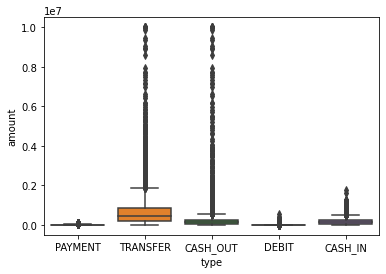

In [25]:
sns.boxplot(x='type', y='amount', data=data)
plt.show()

In [29]:
correlation = data.corr()
print(correlation["isFraud"].sort_values(ascending=False))

isFraud           1.000000
amount            0.128862
step              0.045030
oldbalanceOrg     0.003829
newbalanceDest   -0.000495
oldbalanceDest   -0.007552
newbalanceOrig   -0.009438
Name: isFraud, dtype: float64


In [30]:
#Transforming variables and using key matrices.

data["type"] = data["type"].map({"CASH_OUT": 1, "PAYMENT": 2, 
                                 "CASH_IN": 3, "TRANSFER": 4,
                                 "DEBIT": 5})
data["isFraud"] = data["isFraud"].map({0: "No Fraud", 1: "Fraud"})
print(data.head())

   step  type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1     2   9839.64  C1231006815       170136.0       160296.36   
1     1     2   1864.28  C1666544295        21249.0        19384.72   
2     1     4    181.00  C1305486145          181.0            0.00   
3     1     1    181.00   C840083671          181.0            0.00   
4     1     2  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest   isFraud  
0  M1979787155             0.0             0.0  No Fraud  
1  M2044282225             0.0             0.0  No Fraud  
2   C553264065             0.0             0.0     Fraud  
3    C38997010         21182.0             0.0     Fraud  
4  M1230701703             0.0             0.0  No Fraud  


In [31]:
import numpy as np

In [32]:
from sklearn.model_selection import train_test_split
x = np.array(data[["type", "amount", "oldbalanceOrg", "newbalanceOrig"]])
y = np.array(data[["isFraud"]])

In [33]:
from sklearn.tree import DecisionTreeClassifier
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.10, random_state=42)
model = DecisionTreeClassifier()
model.fit(xtrain, ytrain)
print(model.score(xtest, ytest))

0.9994373342997196


In [61]:
features = np.array([[4, 9000.60, 9000.60, 0.0]])
print(model.predict(features))

['Fraud']


In [35]:
x = np.array(data[["type", "amount", "oldbalanceDest", "newbalanceDest"]])
y = np.array(data[["isFraud"]])

In [48]:
features = np.array([[4, 9000.60, 9000.60, 0.0]])
print(model.predict(features))

['Fraud']


In [37]:
from sklearn.ensemble import RandomForestClassifier
x_train, xtest, y_train, ytest = train_test_split(x, y, test_size=0.10, random_state=42)
model2 = RandomForestClassifier()
model2.fit(x_train, y_train)
print(model2.score(xtest, ytest))

C:\Users\Kenny\AppData\Local\Temp/ipykernel_2456/2476443328.py:4: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



0.9993705773522288


In [ ]:
# A realistic model
# The business should be concerned baout true positive

In [53]:
from sklearn.linear_model import LogisticRegression

In [54]:
LR = LogisticRegression()

In [55]:
LR.fit(x_train,y_train)

C:\Users\Kenny\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



LogisticRegression()

In [56]:
LR_preds = LR.predict(xtest)

In [57]:
from sklearn.metrics import classification_report

In [58]:
print(classification_report(LR_preds, ytest))

C:\Users\Kenny\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

C:\Users\Kenny\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.



              precision    recall  f1-score   support

       Fraud       0.00      0.00      0.00         0
    No Fraud       1.00      1.00      1.00    104858

    accuracy                           1.00    104858
   macro avg       0.50      0.50      0.50    104858
weighted avg       1.00      1.00      1.00    104858



C:\Users\Kenny\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.



In [59]:
from sklearn.neighbors import KNeighborsClassifier
KN = KNeighborsClassifier()


In [60]:
KN.fit(x_train,y_train)
KN_preds = KN.predict(xtest)
print(classification_report(KN_preds, ytest))

C:\Users\Kenny\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



              precision    recall  f1-score   support

       Fraud       0.13      0.65      0.21        23
    No Fraud       1.00      1.00      1.00    104835

    accuracy                           1.00    104858
   macro avg       0.56      0.83      0.61    104858
weighted avg       1.00      1.00      1.00    104858



In [ ]:
#Out of all the transcations the model predicted that are fraudulent only 13% are were actually captured as fraudulent.
#Out of all the predicted fraudulent transactions, the modle only predictied this outcom 65%  wecorrectly 

